# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 28.6585,
        "lon": -17.9182
    },
    "dt": 1680274379,
    "id": 2514651,
    "main": {
        "feels_like": 299.56,
        "humidity": 32,
        "pressure": 1023,
        "temp": 300.01,
        "temp_max": 300.01,
        "temp_min": 300.01
    },
    "name": "Los Llanos de Aridane",
    "sys": {
        "country": "ES",
        "id": 2377,
        "sunrise": 1680246187,
        "sunset": 1680290909,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 6.69
    }
}


In [4]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    # except:
    #     print("City not found. Skipping...")
    #     pass
    except Exception as e:
        print(e)
        print("City not found") 
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | saint-augustin
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | padang
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | baoqing
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | marabba
Processing Record 13 of Set 1 | belushya guba
'coord'
City not found
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | cape elizabeth
'coord'
City not found
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | taolanaro
'coord'
City not found
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | tubmanburg
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | geraldton
Process

In [5]:
len(city_data)

551

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,5.90,45,99,0.89,US,1680274101
1,saint-augustin,51.2260,-58.6502,0.03,74,82,0.99,CA,1680274379
2,thompson,55.7435,-97.8558,-15.91,66,75,1.54,CA,1680274379
3,padang,-0.9492,100.3543,26.03,85,100,1.42,ID,1680274379
4,east london,-33.0153,27.9116,22.52,60,0,2.57,ZA,1680274379


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.90,45,99,0.89,US,1680274101
1,saint-augustin,51.2260,-58.6502,0.03,74,82,0.99,CA,1680274379
2,thompson,55.7435,-97.8558,-15.91,66,75,1.54,CA,1680274379
3,padang,-0.9492,100.3543,26.03,85,100,1.42,ID,1680274379
4,east london,-33.0153,27.9116,22.52,60,0,2.57,ZA,1680274379


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

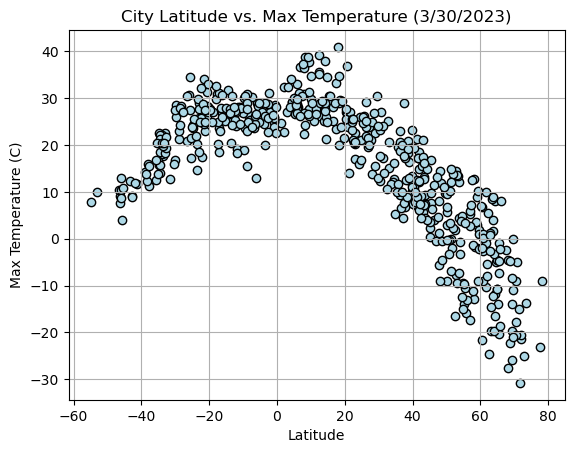

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

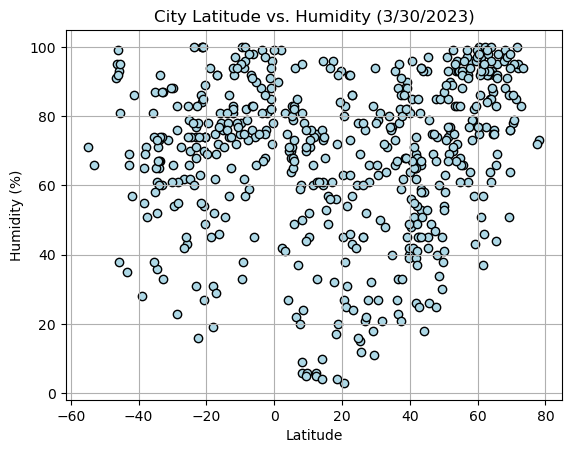

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

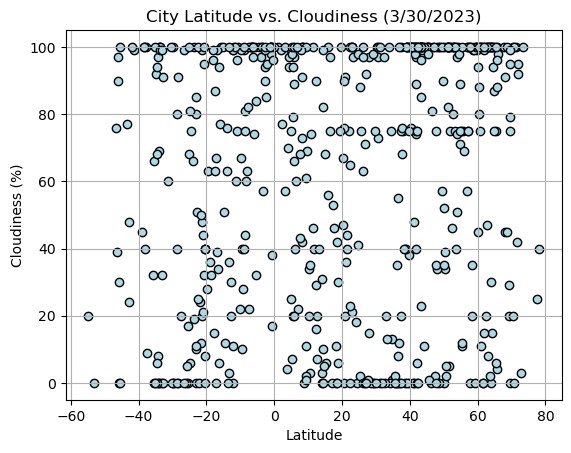

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

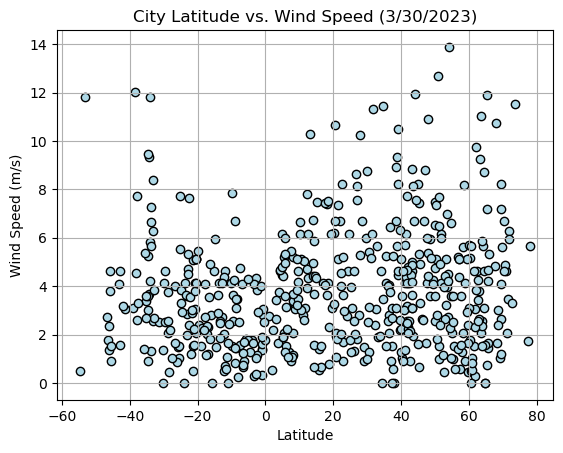

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.90,45,99,0.89,US,1680274101
1,saint-augustin,51.2260,-58.6502,0.03,74,82,0.99,CA,1680274379
2,thompson,55.7435,-97.8558,-15.91,66,75,1.54,CA,1680274379
5,baoqing,46.3317,132.2111,4.10,49,0,2.64,CN,1680274379
6,khatanga,71.9667,102.5000,-21.46,94,92,6.26,RU,1680274379


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,padang,-0.9492,100.3543,26.03,85,100,1.42,ID,1680274379
4,east london,-33.0153,27.9116,22.52,60,0,2.57,ZA,1680274379
8,hobart,-42.8794,147.3294,9.03,69,48,4.63,AU,1680274300
9,avarua,-21.2078,-159.7750,25.03,100,99,0.51,CK,1680274379
10,punta arenas,-53.1500,-70.9167,10.01,66,0,11.83,CL,1680274379


###  Temperature vs. Latitude Linear Regression Plot

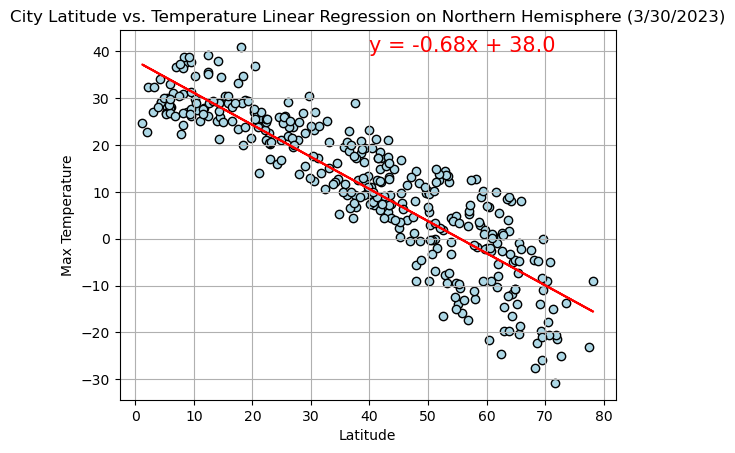

The r-value is: 0.7893733317352254


In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Temperature Linear Regression on Northern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

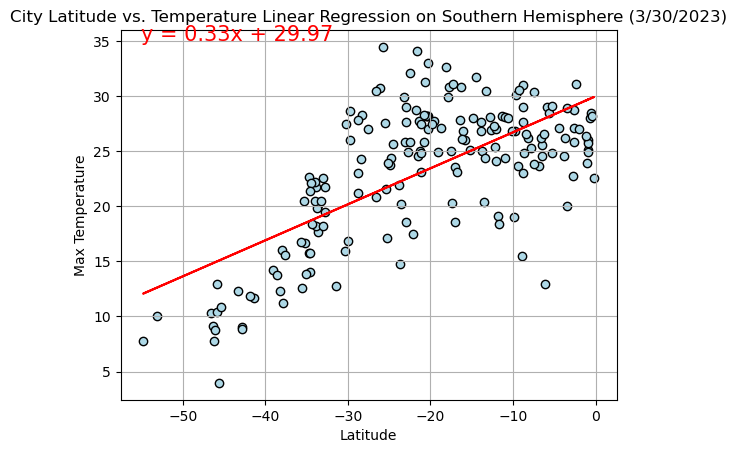

The r-value is: 0.45419429037891634


In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")

# # Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Temperature Linear Regression on Southern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

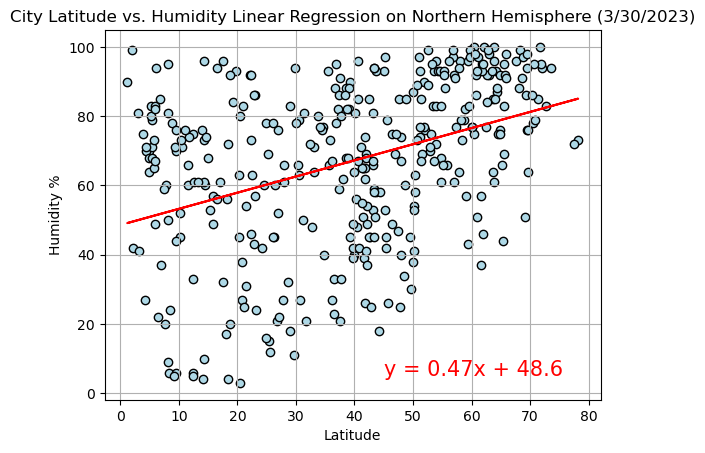

The r-value is: 0.15165540179889683


In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(45,5),fontsize=15,color="red")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity Linear Regression on Northern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

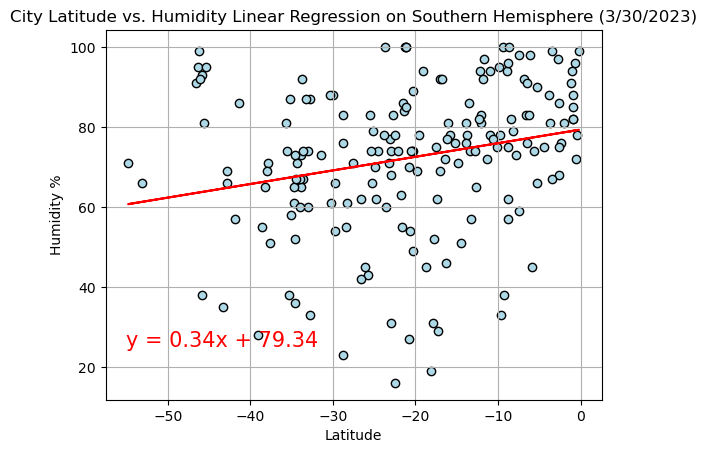

The r-value is: 0.056891637523821384


In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# # Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity Linear Regression on Southern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

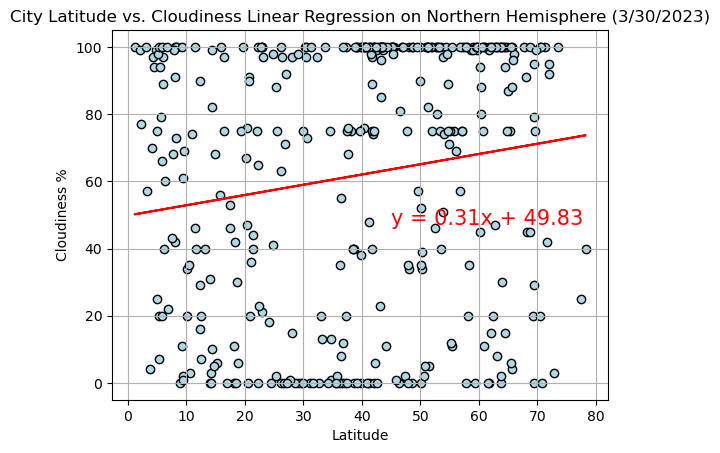

The r-value is: 0.024137221420218003


In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(45,47),fontsize=15,color="red")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness Linear Regression on Northern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

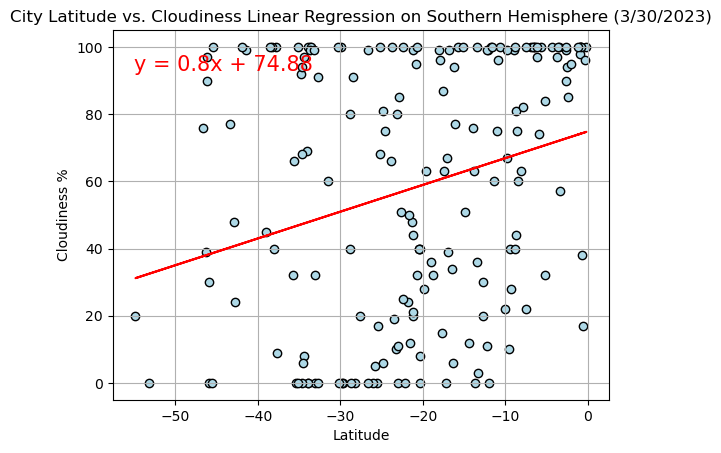

The r-value is: 0.07232097383815186


In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

# # Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness Linear Regression on Southern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

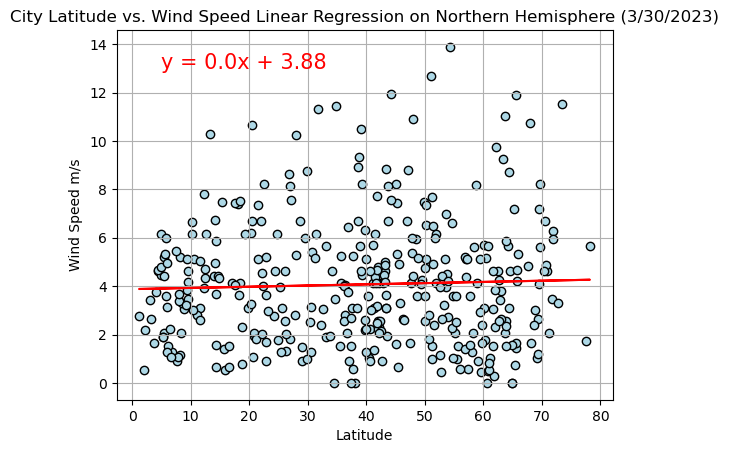

The r-value is: 0.0014961814497729208


In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(5,13),fontsize=15,color="red")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('City Latitude vs. Wind Speed Linear Regression on Northern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

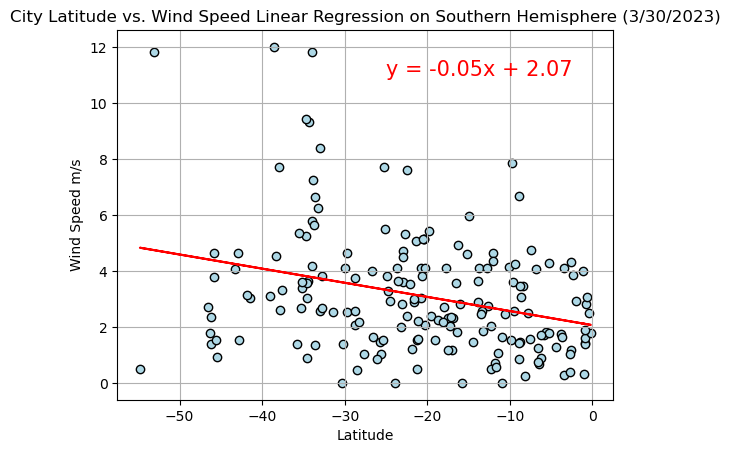

The r-value is: 0.09043641486290556


In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(-25,11),fontsize=15,color="red")

# # Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('City Latitude vs. Wind Speed Linear Regression on Southern Hemisphere (3/30/2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE